In [1]:
! pip install lightgbm

In [2]:
!pip install xgboost

In [3]:
import pandas as pd
import numpy as np
import sklearn.utils
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score, RandomizedSearchCV
from sklearn.model_selection import KFold 
from sklearn.metrics import recall_score, accuracy_score, precision_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import imblearn
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
import xgboost as xgb
import lightgbm as lgb

In [4]:
df = pd.read_csv("Data_for_UCI_named.csv")
df.head(5)

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,0.055347,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,-0.005957,stable
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,0.003471,unstable
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,0.028871,unstable
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,0.049860,unstable


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   tau1    10000 non-null  float64
 1   tau2    10000 non-null  float64
 2   tau3    10000 non-null  float64
 3   tau4    10000 non-null  float64
 4   p1      10000 non-null  float64
 5   p2      10000 non-null  float64
 6   p3      10000 non-null  float64
 7   p4      10000 non-null  float64
 8   g1      10000 non-null  float64
 9   g2      10000 non-null  float64
 10  g3      10000 non-null  float64
 11  g4      10000 non-null  float64
 12  stab    10000 non-null  float64
 13  stabf   10000 non-null  object 
dtypes: float64(13), object(1)
memory usage: 1.1+ MB


In [6]:
df["stabf"].value_counts()

unstable    6380
stable      3620
Name: stabf, dtype: int64

In [7]:
df = sklearn.utils.shuffle(df)
df = df.reset_index(drop = True)

In [8]:
df.shape

(10000, 14)

In [9]:
label = LabelEncoder()

In [10]:
df["stabf"] = label.fit_transform(df["stabf"])

In [11]:
df.head(5)

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
0,4.503727,4.326473,8.221550,2.262702,5.167297,-1.879975,-1.410019,-1.877303,0.413510,0.270455,0.227312,0.162249,-0.031327,0
1,7.577401,1.283206,6.454920,0.776520,4.585249,-1.002866,-1.790188,-1.792195,0.763791,0.927103,0.801060,0.667818,-0.003118,0
2,8.504026,1.062879,2.603237,1.491814,4.322333,-1.895125,-1.042159,-1.385049,0.386013,0.377971,0.737806,0.563130,-0.037425,0
3,3.557909,8.257219,6.413341,9.363515,3.521782,-0.887749,-1.177632,-1.456401,0.299333,0.748006,0.056119,0.185426,0.007126,1
4,2.872620,2.749695,7.486125,8.355888,3.670751,-1.957749,-0.559761,-1.153241,0.056849,0.328501,0.989285,0.822212,0.052579,1


In [12]:
X = df.drop(columns = ["stab", "stabf"], axis=1)
y = df["stabf"]

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
smote = SMOTE(random_state = 0)

In [15]:
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

In [16]:
scaler = MinMaxScaler()

In [17]:
scaled_train = scaler.fit_transform(X_train_balanced)
scaled_train = pd.DataFrame(scaled_train, columns=X_train_balanced.columns)

In [18]:
X_test = X_test.reset_index(drop=True)
scaled_test = scaler.transform(X_test)
scaled_test = pd.DataFrame(scaled_test, columns=X_test.columns)

In [19]:
xgboost = xgb.XGBClassifier(random_state=1)
xgboost.fit(scaled_train, y_train_balanced)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=1, ...)

In [20]:
rnd = RandomForestClassifier(random_state=1)
rnd.fit(scaled_train, y_train_balanced)


RandomForestClassifier(random_state=1)

In [21]:
ext = ExtraTreesClassifier(random_state=1)
ext.fit(scaled_train, y_train_balanced)

ExtraTreesClassifier(random_state=1)

In [22]:
light = lgb.LGBMClassifier(random_state=1)
light.fit(scaled_train, y_train_balanced)

LGBMClassifier(random_state=1)

In [23]:
for m in [xgboost, rnd, ext, light]:
    train_acc = m.score(scaled_train, y_train_balanced)
    test_acc = m.score(scaled_test, y_test)
    
    print("Training Accuracy:", round(train_acc, 4))
    print("Test Accuracy:", round(test_acc, 4))

Training Accuracy: 1.0
Test Accuracy: 0.947
Training Accuracy: 1.0
Test Accuracy: 0.923
Training Accuracy: 1.0
Test Accuracy: 0.938
Training Accuracy: 0.9952
Test Accuracy: 0.9445


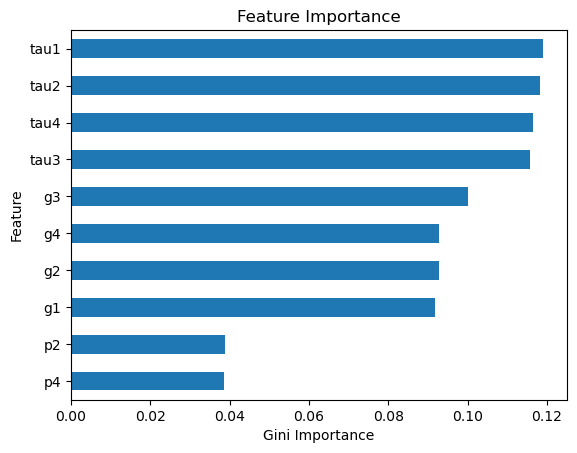

In [24]:
importances = ext.feature_importances_

# Associate importances with feature names
feature_names = list(X_train.columns)
feat_imp = pd.Series(importances, index = feature_names)#, index = features)
# Plot 10 most important features
feat_imp.sort_values().tail(10).plot(kind="barh")
plt.xlabel("Gini Importance")
plt.ylabel("Feature")
plt.title("Feature Importance");

In [25]:
params = {"max_depth": [3, None],
              "max_features": [1, 3, 10],
              "min_samples_split": [1, 3, 10],
              "min_samples_leaf": [1, 3, 10],
              # "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

In [26]:
search = RandomizedSearchCV(ext, cv=5, n_iter=10, param_distributions=params, scoring = 'accuracy', n_jobs = -1, verbose = 1,random_state = 1)

In [27]:
search.fit(scaled_train, y_train_balanced)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=ExtraTreesClassifier(random_state=1),
                   n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [3, None],
                                        'max_features': [1, 3, 10],
                                        'min_samples_leaf': [1, 3, 10],
                                        'min_samples_split': [1, 3, 10]},
                   random_state=1, scoring='accuracy', verbose=1)

In [28]:
search.score(scaled_test, y_test)

0.933

In [29]:
search.best_params_

{'min_samples_split': 1,
 'min_samples_leaf': 1,
 'max_features': 3,
 'max_depth': None,
 'criterion': 'entropy'}